# Import data

Parser for the .tcx files

In [1]:
!pip install python-tcxparser

     |████████████████████████████████| 6.9 MB 2.1 MB/s eta 0:00:01
You should consider upgrading via the '/home/stefano/Documents/University/Master/SL/.venv/bin/python -m pip install --upgrade pip' command.


In [1]:
import csv
import json
import pandas as pd
import numpy as np
import tcxparser
import os
import glob
import time

In [2]:
paths_to_data = {'fit':'./Data/Juan/Run/Fit', 'arduino':'./data/arduino/Run'}

## Google Fit

### Parse .tcx files

In [3]:
path_to_tcx = 'Actividades/*_Correr.tcx'

file_names = sorted(glob.iglob(os.path.join(paths_to_data['fit'], path_to_tcx)))

In [4]:
file_names

['./Data/Juan/Run/Fit\\Actividades\\2021-04-15T17_30_00+02_00_PT1H_Correr.tcx',
 './Data/Juan/Run/Fit\\Actividades\\2021-04-16T19_17_24+02_00_PT24M30.214S_Correr.tcx',
 './Data/Juan/Run/Fit\\Actividades\\2021-04-21T19_00_21+02_00_PT27M2.514S_Correr.tcx',
 './Data/Juan/Run/Fit\\Actividades\\2021-04-22T19_14_23+02_00_PT26M43.306S_Correr.tcx',
 './Data/Juan/Run/Fit\\Actividades\\2021-04-24T19_17_42+02_00_PT29M4.835S_Correr.tcx',
 './Data/Juan/Run/Fit\\Actividades\\2021-04-27T18_48_52+02_00_PT26M3.495S_Correr.tcx',
 './Data/Juan/Run/Fit\\Actividades\\2021-04-30T19_01_36+02_00_PT26M4.218S_Correr.tcx',
 './Data/Juan/Run/Fit\\Actividades\\2021-05-02T18_00_06+02_00_PT26M29.817S_Correr.tcx',
 './Data/Juan/Run/Fit\\Actividades\\2021-05-04T18_58_29+02_00_PT26M47.161S_Correr.tcx',
 './Data/Juan/Run/Fit\\Actividades\\2021-05-07T18_33_51+02_00_PT25M43.034S_Correr.tcx']

In [16]:
example_file = file_names[1]
tcx = tcxparser.TCXParser(example_file)

In [43]:
dir(tcx)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'activity',
 'activity_notes',
 'activity_type',
 'altitude_avg',
 'altitude_max',
 'altitude_min',
 'altitude_points',
 'ascent',
 'cadence_avg',
 'cadence_max',
 'cadence_values',
 'calories',
 'completed_at',
 'descent',
 'distance',
 'distance_units',
 'distance_values',
 'duration',
 'hr_avg',
 'hr_max',
 'hr_min',
 'hr_percent_in_zones',
 'hr_values',
 'latitude',
 'longitude',
 'pace',
 'position_values',
 'root',
 'started_at',
 'time_values']

In [44]:
example_file

'./data/fit/Activities/2021-04-13T19_19_58+02_00_PT34M22.717S_Corsa.tcx'

In [17]:
tcx.position_values()

[(41.94034194946289, 12.523218154907227),
 (41.940338134765625, 12.523214340209961),
 (41.94029235839844, 12.52302360534668),
 (41.9402961730957, 12.523015975952148),
 (41.9403076171875, 12.52299976348877),
 (41.94032287597656, 12.522989273071289),
 (41.94033432006836, 12.522985458374023),
 (41.94035720825195, 12.52298355102539),
 (41.940364837646484, 12.522985458374023),
 (41.940399169921875, 12.522987365722656),
 (41.94041442871094, 12.52298355102539),
 (41.9404296875, 12.522992134094238),
 (41.94045639038086, 12.522997856140137),
 (41.940467834472656, 12.523000717163086),
 (41.940486907958984, 12.523006439208984),
 (41.94050979614258, 12.523015022277832),
 (41.940528869628906, 12.523015975952148),
 (41.9405403137207, 12.523016929626465),
 (41.94055938720703, 12.523018836975098),
 (41.94057083129883, 12.523018836975098),
 (41.940589904785156, 12.523018836975098),
 (41.94060516357422, 12.523018836975098),
 (41.94062042236328, 12.523016929626465),
 (41.940670013427734, 12.5230093002319

In [21]:
tcx.time_values()

['2021-04-16T17:17:24.886Z',
 '2021-04-16T17:17:26.036Z',
 '2021-04-16T17:17:26.222Z',
 '2021-04-16T17:17:29.733Z',
 '2021-04-16T17:17:34.179Z',
 '2021-04-16T17:17:34.535Z',
 '2021-04-16T17:17:35.255Z',
 '2021-04-16T17:17:35.974Z',
 '2021-04-16T17:17:36.359Z',
 '2021-04-16T17:17:37.079Z',
 '2021-04-16T17:17:37.399Z',
 '2021-04-16T17:17:38.539Z',
 '2021-04-16T17:17:39.298Z',
 '2021-04-16T17:17:39.670Z',
 '2021-04-16T17:17:40.392Z',
 '2021-04-16T17:17:40.777Z',
 '2021-04-16T17:17:41.394Z',
 '2021-04-16T17:17:41.891Z',
 '2021-04-16T17:17:42.611Z',
 '2021-04-16T17:17:42.976Z',
 '2021-04-16T17:17:43.735Z',
 '2021-04-16T17:17:44.120Z',
 '2021-04-16T17:17:44.859Z',
 '2021-04-16T17:17:45.394Z',
 '2021-04-16T17:17:45.935Z',
 '2021-04-16T17:17:47.077Z',
 '2021-04-16T17:17:47.836Z',
 '2021-04-16T17:17:48.210Z',
 '2021-04-16T17:17:48.959Z',
 '2021-04-16T17:17:49.314Z',
 '2021-04-16T17:17:50.073Z',
 '2021-04-16T17:17:50.438Z',
 '2021-04-16T17:17:51.198Z',
 '2021-04-16T17:17:51.573Z',
 '2021-04-16T1

In [47]:
sampling_intervals = np.array(tcx.time_values()[1:], dtype='datetime64') - np.array(tcx.time_values()[0:-1], dtype='datetime64')

<ipython-input-47-de8bcabb9592>:1: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  sampling_intervals = np.array(tcx.time_values()[1:], dtype='datetime64') - np.array(tcx.time_values()[0:-1], dtype='datetime64')


In [48]:
min_int = np.amin(sampling_intervals)
max_int = np.amax(sampling_intervals)

print('Min:\t', min_int, '\nMax:', max_int)

Min:	 119 milliseconds 
Max: 10717 milliseconds


The tcx file contains only the data regarding the altitude, the space coordinates (latitude and longitude), the distance and the timestamp. These values are sampled at a variable frequency.

In [49]:
min(tcx.altitude_points())

48.339359283447266

In [56]:
def load_tcx(file_list):
    """
    Load tcx files into pandas DataFrame
    
    Known issue: 
    the lists altitude, timestamp and distance have not the same length;
    we don't know the position of the missing data (potential values' shift);
    """
    df = pd.DataFrame(columns=['timestamp','altitude','distance'])
    
    for file in file_list:
        tcx_obj = tcxparser.TCXParser(file)
        default_len = min([len(tcx_obj.time_values())],
                          [len(tcx_obj.altitude_points())],
                          [len(tcx_obj.distance_values())])[0]
        data_dict = {'timestamp':tcx_obj.time_values()[-default_len:], 
                     'altitude':tcx_obj.altitude_points()[-default_len:], 
                     'distance':tcx_obj.distance_values()[-default_len:]}
        tmp_df = pd.DataFrame(data_dict)
        print(tmp_df.head())
        print('===============')
        df = pd.concat([df, tmp_df])
        
    df["timestamp"] = pd.to_datetime(df["timestamp"], format="%Y-%m-%dT%H:%M:%S.%fZ")
        
    return df.sort_values(by='timestamp')

In [57]:
tcx_df = load_tcx(file_names)

                  timestamp   altitude                  distance
0  2021-04-15T15:30:01.084Z  57.545860  [[[15.929916381835938]]]
1  2021-04-15T15:30:01.458Z  57.994812  [[[15.929916381835938]]]
2  2021-04-15T15:30:02.245Z  57.994812  [[[15.929916381835938]]]
3  2021-04-15T15:30:02.607Z  57.994812  [[[15.929916381835938]]]
4  2021-04-15T15:30:03.378Z  55.777882  [[[15.929916381835938]]]
                  timestamp   altitude                  distance
0  2021-04-16T17:17:34.535Z  68.286392  [[[161.51947784423828]]]
1  2021-04-16T17:17:35.255Z  68.281609  [[[161.51947784423828]]]
2  2021-04-16T17:17:35.974Z  63.980598  [[[161.51947784423828]]]
3  2021-04-16T17:17:36.359Z  63.980598  [[[161.51947784423828]]]
4  2021-04-16T17:17:37.079Z  63.980598  [[[161.51947784423828]]]
                  timestamp   altitude                 distance
0  2021-04-21T17:00:33.222Z  96.402382  [[[76.67558479309082]]]
1  2021-04-21T17:00:33.961Z  75.242935  [[[76.67558479309082]]]
2  2021-04-21T17:00:35.037Z 

In [58]:
tcx_df.head()

,timestamp,altitude,distance
0,2021-04-15 15:30:01.084,57.545860,[[[15.929916381835938]]]
1,2021-04-15 15:30:01.458,57.994812,[[[15.929916381835938]]]
2,2021-04-15 15:30:02.245,57.994812,[[[15.929916381835938]]]
3,2021-04-15 15:30:02.607,57.994812,[[[15.929916381835938]]]
4,2021-04-15 15:30:03.378,55.777882,[[[15.929916381835938]]]


### Parse JSON

#### All Sessions

The data inside the folder **All Sessions** contains just summaries regarding the activity:

- startTime
- endTime
- duration (endTime - startTime)
- final step count 
- distance 
- average speed
- time of activity (in minutes)
- estimated calories

In [61]:
path_to_raw_json = 'All Sessions/*RUNNING*'

file_names = glob.iglob(os.path.join(paths_to_data['fit'], path_to_raw_json))

In [62]:
ex_file = file_names.__next__()


with open(ex_file, 'r') as json_file:
    json_content = json.load(json_file)

In [63]:
json_content

{'fitnessActivity': 'running',
 'startTime': '2021-05-02T17:18:25.616Z',
 'endTime': '2021-05-02T17:52:04.339Z',
 'duration': '2017.812s',
 'segment': [{'fitnessActivity': 'running',
   'startTime': '2021-05-02T17:18:25.616Z',
   'endTime': '2021-05-02T17:52:03.428Z'}],
 'aggregate': [{'metricName': 'com.google.heart_minutes.summary',
   'floatValue': 66.0},
  {'metricName': 'com.google.calories.expended',
   'floatValue': 451.66382590308785},
  {'metricName': 'com.google.step_count.delta', 'intValue': 5131},
  {'metricName': 'com.google.distance.delta', 'floatValue': 6139.019788086414},
  {'metricName': 'com.google.speed.summary', 'floatValue': 3.047296038689514},
  {'metricName': 'com.google.active_minutes', 'intValue': 34}]}

#### All Data

In [74]:
path_to_derived_json = 'All Data/*step_count.delta*'

file_names = glob.iglob(os.path.join(paths_to_data['fit'], path_to_derived_json))

In [75]:
ex_file = file_names.__next__()


with open(ex_file, 'r') as json_file:
    json_content = json.load(json_file)

In [76]:
ex_file

'./data/fit/All Data/derived_com.google.step_count.delta_com.google(5).json'

In [77]:
json_content

{'Data Source': 'derived:com.google.step_count.delta:com.google.android.gms:motorola:moto x4:608951edf41c2b1d:derive_step_deltas<-raw:com.google.step_count.cumulative:motorola:moto x4:608951edf41c2b1d:Step Counter',
 'Data Points': [{'fitValue': [{'value': {'intVal': 78}}],
   'originDataSourceId': 'raw:com.google.step_count.cumulative:motorola:moto x4:608951edf41c2b1d:Step Counter',
   'endTimeNanos': 1617221667754424311,
   'dataTypeName': 'com.google.step_count.delta',
   'startTimeNanos': 1617221551018894293,
   'modifiedTimeMillis': 1617222356498,
   'rawTimestampNanos': 0},
  {'fitValue': [{'value': {'intVal': 10}}],
   'originDataSourceId': 'raw:com.google.step_count.cumulative:motorola:moto x4:608951edf41c2b1d:Step Counter',
   'endTimeNanos': 1617223855802523901,
   'dataTypeName': 'com.google.step_count.delta',
   'startTimeNanos': 1617223795802523901,
   'modifiedTimeMillis': 1617225088590,
   'rawTimestampNanos': 0},
  {'fitValue': [{'value': {'intVal': 14}}],
   'originDat

In [104]:
def extract_steps(file_iter):
    
    for file_name in file_iter:
        
        with open(file_name, 'r') as json_file:
            json_content = json.load(json_file)
            
            data_list = json_content['Data Points']
            data_dict = {}
            
            for index in range(len(data_list)):
                start = data_list[index]['startTimeNanos'] // 1000000000
                end =  data_list[index]['endTimeNanos'] // 1000000000
                data_dict[index] = [start,end, data_list[index]['fitValue'][0]['value']['intVal']]
                
    data_frame = pd.DataFrame.from_dict(data_dict, columns=['start','end','steps'], orient='index')
    
    data_frame['start'] = data_frame['start'].dt.tz_localize('Europe/Rome')
    data_fame['end'] = data_fame['end'].dt.tz_localize('Europe/Rome')
    data_frame['interval'] = data_frame.end - data_frame.start
    data_frame['session'] = None
    data_frame.sort_values(by='start')
    return data_frame

---

## Arduino

List all the files in the folder

In [3]:
file_names = glob.glob(os.path.join(paths_to_data['arduino'], '*'))
file_names

['./data/arduino/Run/Run_9.csv',
 './data/arduino/Run/Run_3.csv',
 './data/arduino/Run/Run_8.csv',
 './data/arduino/Run/Run_4.csv',
 './data/arduino/Run/Run_5.csv',
 './data/arduino/Run/Run_2.csv',
 './data/arduino/Run/Run_1.csv',
 './data/arduino/Run/Run_10.csv',
 './data/arduino/Run/Run_6.csv',
 './data/arduino/Run/Run_7.csv']

Load the files and store the content in a DataFrame

In [4]:
def load_arduino(file_list):
    
    df = pd.DataFrame(columns=['session', 'timestamp','DecibelSource','LinearAccelerometerSensor','AccX','AccY','AccZ'])
    
    for file_name in file_list:
        tmp_df = pd.read_csv(file_name)
        tmp_df['session'] = int(file_name.split('/')[-1][4:-4])
        df = pd.concat([df, tmp_df])
        
    return df.sort_values(by='timestamp')        

In [5]:
df = load_arduino(file_names)

In [20]:
df.head(30)

,session,timestamp,DecibelSource,LinearAccelerometerSensor,AccX,AccY,AccZ
0,1,1618334405372,6.412549,NaN,NaN,NaN,NaN
1,1,1618334405394,NaN,NaN,-1.666458,3.380386,7.740662
2,1,1618334405413,7.082729,NaN,NaN,NaN,NaN
3,1,1618334405442,NaN,NaN,NaN,NaN,11.349045
4,1,1618334405453,4.674826,NaN,NaN,NaN,NaN
5,1,1618334405463,NaN,1.277912,0.027664,4.143707,10.260315
6,1,1618334405472,NaN,NaN,-0.711716,4.227448,9.391724
7,1,1618334405490,NaN,NaN,-0.587296,4.112595,9.934891
8,1,1618334405493,10.108893,NaN,NaN,NaN,NaN
9,1,1618334405494,NaN,NaN,-0.300156,NaN,9.918137


Fix the NaN values:

In [24]:
def fill_nan(df, method):
    """
    Fill NaN values
    """
    
    df['DecibelSource'] = df['DecibelSource'].interpolate(method=method)
    df['LinearAccelerometerSensor'] = df['LinearAccelerometerSensor'].interpolate(method=method)
    df['AccX'] = df['AccX'].interpolate(method=method)
    df['AccY'] = df['AccY'].interpolate(method=method)
    df['AccZ'] = df['AccZ'].interpolate(method=method)
    
    return df

In [25]:
df = fill_nan(df, method='linear')

<AxesSubplot:>

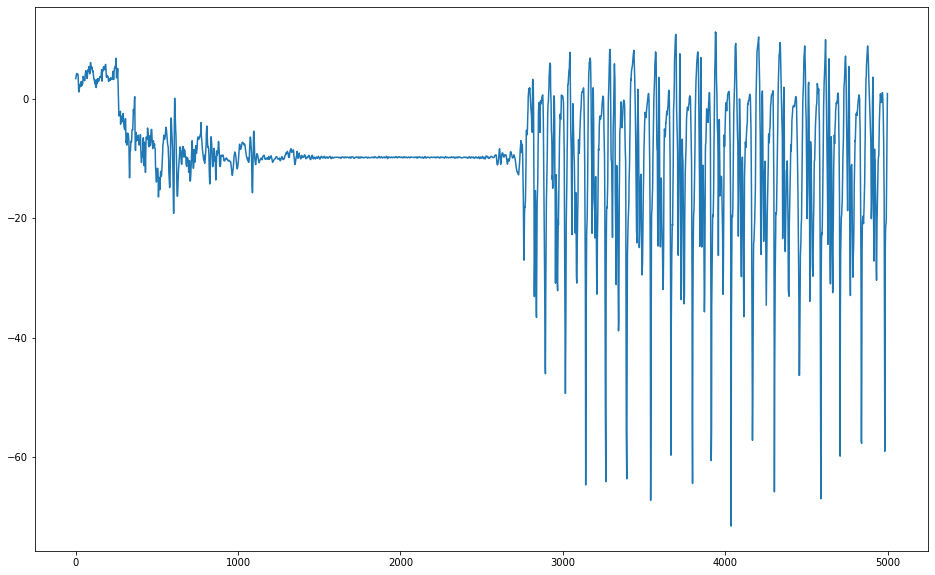

In [37]:
df[df['session'] == 1]['AccY'][:5000:].plot(figsize=(16,10))

Check the records

In [64]:
def fix_nans(df):
    
    sessions = list(df['session'].unique())
    columns = df.columns.drop(['session', 'timestamp'])
    
    for session in sessions:
        for column in columns:
            not_null_mask = df[column].notnull()
            x0 = df[not_null_mask]['timestamp']
            x1 = x0.shift(-1)
            y0 = df[not_null_mask]['timestamp']
            y1 = y0.shift(-1)
            for i,j in zip(x0.index, x0.iloc[1:].index):
                if i < j:
                    m = (y1[i] - y0[i]) / (x1[i] - x0[i])
                    intercept = y0[i] - m * x0[i]
                    line = lambda x,m,c: m*x + c
                    df[(i+1):j][column] = df[(i+1):j]['timestamp'].apply(line, args=(m,intercept))
    return something
                

In [19]:
test_df = pd.DataFrame({'a':[1,2,3,None,5,6], 'b':[1,2,3,4,5,6]})

In [20]:
z = test_df['a'].shift(-1)

In [21]:
z

0    2.0
1    3.0
2    NaN
3    5.0
4    6.0
5    NaN
Name: a, dtype: float64

In [14]:
test_df['a'] - z

0   -1.0
1   -1.0
2   -1.0
3   -1.0
4   -1.0
5    NaN
Name: a, dtype: float64

In [32]:
test_df[test_df['a'].notnull()]['a'].shift(-1)[4]

6.0

In [62]:
test_df[test_df['a'].notnull()]['a'][1:4]

1    2.0
2    3.0
4    5.0
Name: a, dtype: float64

In [61]:
df[0:3]

,session,timestamp,DecibelSource,LinearAccelerometerSensor,AccX,AccY,AccZ
0,1,1618334405372,6.412549,NaN,NaN,NaN,NaN
1,1,1618334405394,NaN,NaN,-1.666458,3.380386,7.740662
2,1,1618334405413,7.082729,NaN,NaN,NaN,NaN


In [83]:
session_time = []

for i in range(1, 11):
    session_time.append((df[df['session'] == i].iloc[-1]['timestamp']  - df[df['session'] == i].iloc[0]['timestamp']) / 60000)

In [84]:
session_time

[34.135983333333336,
 32.7286,
 33.73211666666667,
 33.07163333333333,
 32.6069,
 25.378233333333334,
 32.527566666666665,
 32.18376666666666,
 33.44681666666666,
 33.76665]

In [86]:
df.tail(50)

,session,timestamp,DecibelSource,LinearAccelerometerSensor,AccX,AccY,AccZ
321826,10,1620321727436,12.192029,1.974043,1.511185,6.554489,6.364532
321827,10,1620321727448,11.009868,1.890198,1.446579,6.379822,5.960144
321828,10,1620321727463,9.827708,1.806352,1.355652,6.213516,5.724449
321829,10,1620321727473,11.129404,1.722507,1.264725,6.047211,5.488754
321830,10,1620321727499,12.431099,2.121587,0.185562,5.405945,4.677582
321831,10,1620321727503,13.732795,2.520668,-0.590912,5.243233,4.334213
321832,10,1620321727516,13.722434,2.919749,-1.367386,5.080521,3.990845
321833,10,1620321727528,13.712073,3.318829,-1.781342,5.305435,4.447876
321834,10,1620321727541,13.701712,3.165228,-1.472672,5.303055,5.060440
321835,10,1620321727544,13.691351,3.011626,-1.211853,5.331764,5.178487
